In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv(r'C:\Users\ayesh\Downloads\internship task 4\insurance.csv')  
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Check for missing values
print(df.isnull().sum())  

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
# Encode categorical features
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])           # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])     # yes=1, no=0
df['region'] = le.fit_transform(df['region'])     # categorical numeric


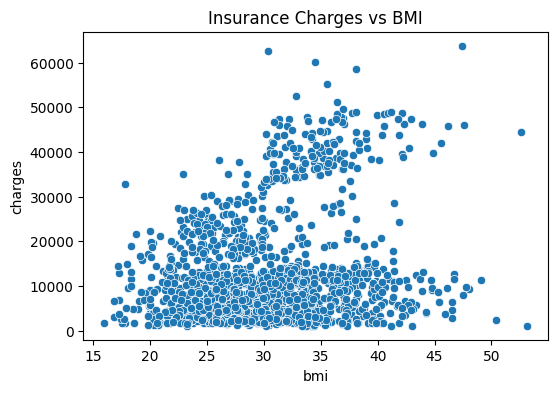

In [6]:
#charges vs BMI
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Insurance Charges vs BMI')
plt.show()


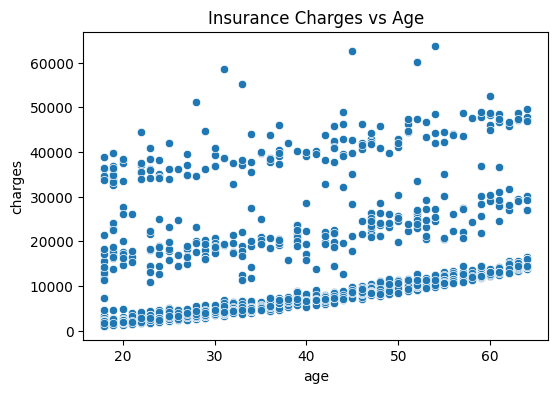

In [7]:
# charges vs age
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Insurance Charges vs Age')
plt.show()


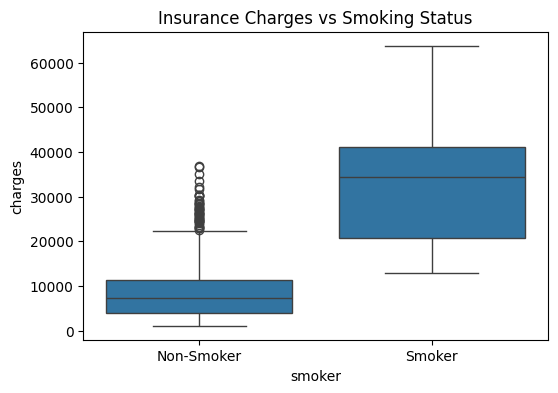

In [8]:
#charges vs smoking status
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges vs Smoking Status')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()


In [9]:
# Features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [10]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", round(mae, 2))
print(" Root Mean Squared Error (RMSE):", round(rmse, 2))


Mean Absolute Error (MAE): 4186.51
 Root Mean Squared Error (RMSE): 5799.59
